C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


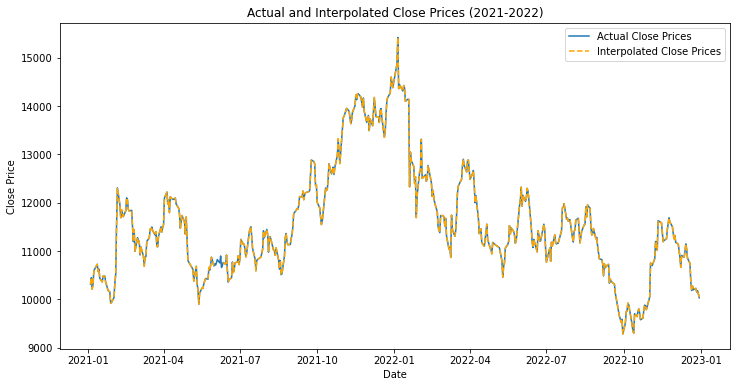

                            AutoReg Model Results                             
Dep. Variable:                  Close   No. Observations:                  481
Model:                     AutoReg(5)   Log Likelihood               -3307.889
Method:               Conditional MLE   S.D. of innovations            252.247
Date:                Wed, 02 Oct 2024   AIC                             11.090
Time:                        09:21:29   BIC                             11.151
Sample:                             5   HQIC                            11.114
                                  481                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    261.5871    120.152      2.177      0.029      26.093     497.081
Close.L1       0.9329      0.046     20.372      0.000       0.843       1.023
Close.L2       0.0587      0.063      0.938      0.3

In [1]:
import pandas_datareader.data as pdr
import statsmodels.api as sm
import matplotlib.pyplot as plt
import datetime as dt
import pandas as pd
import numpy as np

# データの取得
df = pdr.DataReader("6758.JP", "stooq").sort_index()

# 日付範囲の選択（2021年1月1日から2022年12月31日まで）
df_selected = df[dt.datetime(2021,1,1):dt.datetime(2022,12,31)]

# 終値を使う
close_prices = df_selected["Close"]

# 内挿のために一部データを欠損値にする（例: 10日分のデータを欠損させる）
close_prices_interpolate = close_prices.copy()
close_prices_interpolate[dt.datetime(2021, 6, 1):dt.datetime(2021, 6, 10)] = np.nan

# 欠損データのインデックスを取得
missing_idx = close_prices_interpolate.index[close_prices_interpolate.isna()]

# 欠損データがある部分以外でモデルを作成
ar_model = sm.tsa.AutoReg(close_prices_interpolate.dropna(), lags=5)
ar_fit = ar_model.fit()

# 欠損部分のインデックスの位置を取得
missing_start = close_prices.index.get_loc(missing_idx[0])
missing_end = close_prices.index.get_loc(missing_idx[-1])

# 欠損部分のデータを内挿
predicted = ar_fit.predict(start=missing_start, end=missing_end)

# 内挿結果をデータに反映
close_prices_interpolate[missing_idx] = predicted

# 結果のプロット
plt.figure(figsize=(12,6))

# 実データと内挿データのプロット
plt.plot(close_prices.index, close_prices, label="Actual Close Prices")
plt.plot(close_prices_interpolate.index, close_prices_interpolate, label="Interpolated Close Prices", linestyle='--', color='orange')

plt.legend()
plt.title("Actual and Interpolated Close Prices (2021-2022)")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.show()

# モデルの詳細
print(ar_fit.summary())
